### Case Studies - Seasonal Decomposition

In [1]:
import pandas as pd
import numpy as  np

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="ticks")

pd.options.display.max_rows = 12

In [2]:
from statsmodels.tsa.seasonal import seasonal_decompose

#### https://www.ons.gov.uk/peoplepopulationandcommunity/leisureandtourism/timeseries/gmaa/ott


In [3]:
df = pd.read_csv("http://people.bu.edu/kalathur/datasets/GMAA-071119.csv",
                header=None, skiprows=6, parse_dates=[0], names=['period','value'])
df

,period,value
0,1980-01-01,739
1,1980-02-01,602
2,1980-03-01,740
3,1980-04-01,1028
4,1980-05-01,1088
...,...,...
470,2019-03-01,3009
471,2019-04-01,3070
472,2019-05-01,3280
473,2019-06-01,3530


In [4]:
df.set_index('period', inplace=True)
df

,value
period,
1980-01-01,739
1980-02-01,602
1980-03-01,740
1980-04-01,1028
1980-05-01,1088
...,...
2019-03-01,3009
2019-04-01,3070
2019-05-01,3280


In [5]:
df.value.describe()

count     475.000000
mean     2046.141053
std       804.867572
min       540.000000
25%      1408.000000
50%      2068.000000
75%      2624.000000
max      4043.000000
Name: value, dtype: float64

In [6]:
max_date = df.index.max()
min_date = df.index.min()

num_of_actual_points = df.index.shape[0]
num_of_expected_points = (max_date.year - min_date.year) * 12 + max_date.month - min_date.month + 1

print("Date range: {} - {}".format(min_date.strftime("%d.%m.%Y"), max_date.strftime("%d.%m.%Y")))
print("Number of data points: {} of expected {}".format(num_of_actual_points, num_of_expected_points))

Date range: 01.01.1980 - 01.07.2019
Number of data points: 475 of expected 475


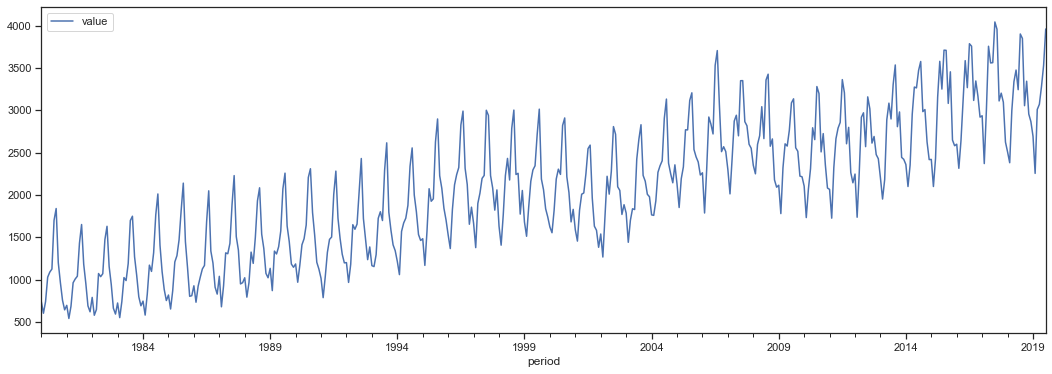

In [7]:
fig, ax = plt.subplots(figsize=(18,6))

df.plot(ax=ax)

plt.legend(loc='upper left');

In [8]:
zoom_range = df['2017':'2018']
zoom_range

,value
period,
2017-01-01,2935
2017-02-01,2370
2017-03-01,3002
2017-04-01,3756
2017-05-01,3559
...,...
2018-08-01,3848
2018-09-01,3054
2018-10-01,3343


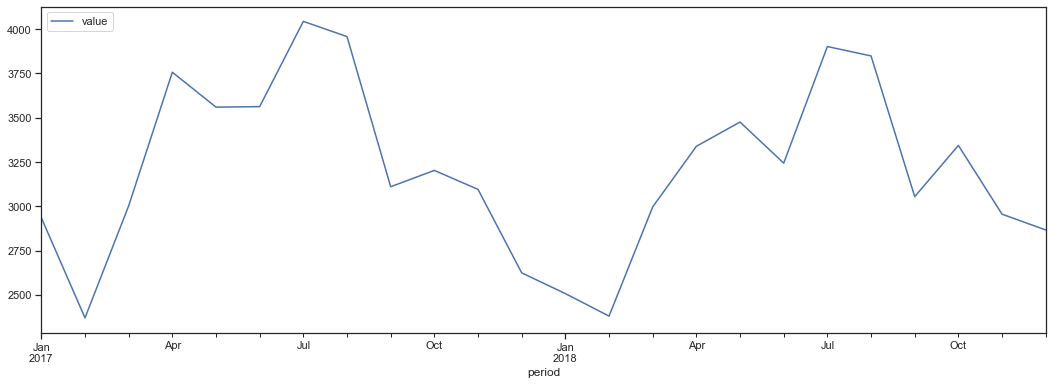

In [9]:
fig, ax = plt.subplots(figsize=(18,6))
zoom_range.plot(ax=ax)
plt.legend(loc='upper left');

- The data has periodic fluctuations each year and overall tendency to grow up.
- Thus, the time series has the trend and yearly seasonality components, and we can try to decompose them using statsmodels package.
- From the data view, the additive model better fits for data representation.


In [10]:
from statsmodels.tsa import stattools as stt
from statsmodels.tsa.seasonal import seasonal_decompose

In [11]:
decompfreq = 12  # 12 months seasonality
model = 'additive'

decomposition = seasonal_decompose(df.value.interpolate("linear"), 
                                   freq=decompfreq, model=model)

In [12]:
df_decomposed = pd.DataFrame({'trend': decomposition.trend,
                              'seasonal' : decomposition.seasonal,
                              'residual' : decomposition.resid})

df_decomposed

,trend,seasonal,residual
period,,,
1980-01-01,NaN,-387.331705,NaN
1980-02-01,NaN,-633.299401,NaN
1980-03-01,NaN,-297.745673,NaN
1980-04-01,NaN,55.927573,NaN
1980-05-01,NaN,144.247748,NaN
...,...,...,...
2019-03-01,NaN,-297.745673,NaN
2019-04-01,NaN,55.927573,NaN
2019-05-01,NaN,144.247748,NaN


In [13]:
df_decomposed.dropna()

,trend,seasonal,residual
period,,,
1980-07-01,1033.083333,645.789021,20.127645
1980-08-01,1028.666667,770.244150,40.089184
1980-09-01,1023.791667,119.490945,56.717389
1980-10-01,1018.750000,21.269791,-77.019791
1980-11-01,1012.625000,-268.510124,10.885124
...,...,...,...
2018-09-01,3164.375000,119.490945,-229.865945
2018-10-01,3153.750000,21.269791,167.980209
2018-11-01,3134.458333,-268.510124,89.051790


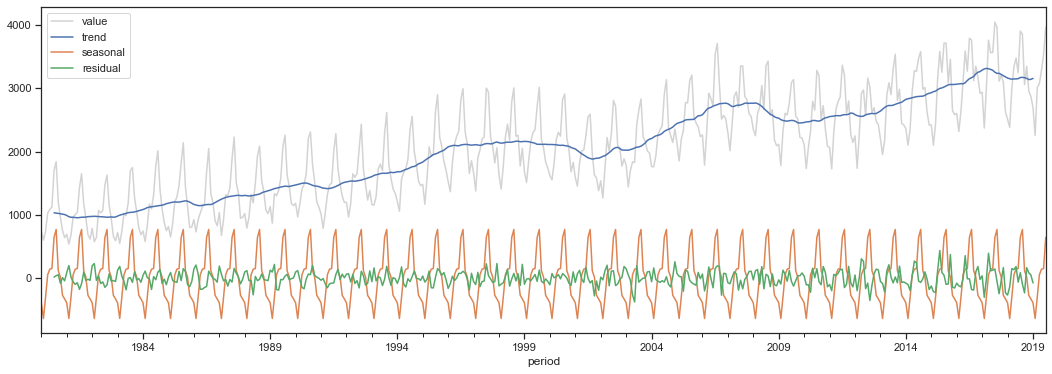

In [14]:
fig, ax = plt.subplots(figsize=(18,6))

df.plot(ax=ax, label="observed", c='lightgrey')

df_decomposed.plot(ax=ax)

plt.legend(loc='upper left');

#### https://fred.stlouisfed.org/series/TOTALSA
 - in millions of units

In [15]:
vehicle_sales = pd.read_csv('http://people.bu.edu/kalathur/datasets/total_vehiclesales.csv',
                           parse_dates=['DATE'],
                           index_col='DATE') 
  
vehicle_sales

,TOTALSA
DATE,
1976-01-01,12.814
1976-02-01,13.340
1976-03-01,13.378
1976-04-01,13.223
1976-05-01,12.962
...,...
2019-05-01,17.932
2019-06-01,17.704
2019-07-01,17.442


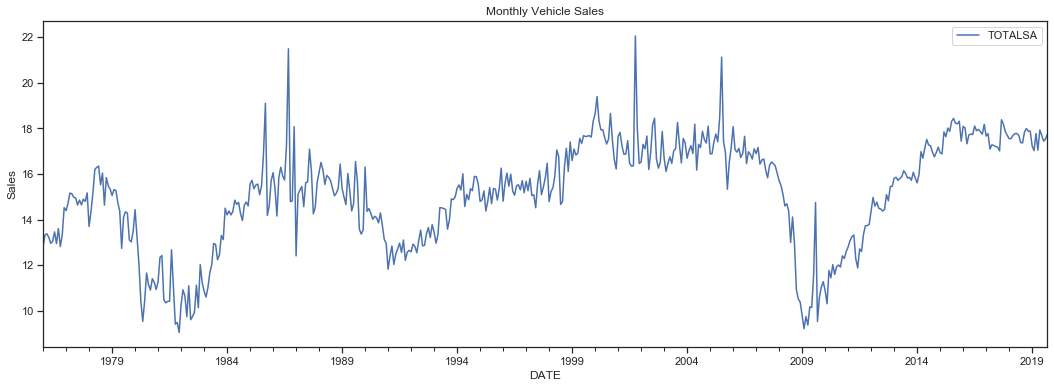

In [16]:
fig, ax = plt.subplots(figsize=(18,6))
plt.ylabel('Sales')

vehicle_sales.plot(ax=ax);

plt.title('Monthly Vehicle Sales');

In [17]:
vehicle_sales_decomp = seasonal_decompose(vehicle_sales, freq=12)

In [18]:
trend    = vehicle_sales_decomp.trend
seasonal = vehicle_sales_decomp.seasonal 
residual = vehicle_sales_decomp.resid

In [19]:
seasonal

,TOTALSA
DATE,
1976-01-01,-0.111070
1976-02-01,-0.018299
1976-03-01,-0.001811
1976-04-01,-0.057304
1976-05-01,-0.020355
...,...
2019-05-01,-0.020355
2019-06-01,-0.090676
2019-07-01,0.027378


In [20]:
df_decomposed = pd.DataFrame({'trend': vehicle_sales_decomp.trend.TOTALSA,
                              'seasonal' : vehicle_sales_decomp.seasonal.TOTALSA,
                              'residual' : vehicle_sales_decomp.resid.TOTALSA})
df_decomposed

,trend,seasonal,residual
DATE,,,
1976-01-01,NaN,-0.111070,NaN
1976-02-01,NaN,-0.018299,NaN
1976-03-01,NaN,-0.001811,NaN
1976-04-01,NaN,-0.057304,NaN
1976-05-01,NaN,-0.020355,NaN
...,...,...,...
2019-05-01,NaN,-0.020355,NaN
2019-06-01,NaN,-0.090676,NaN
2019-07-01,NaN,0.027378,NaN


In [21]:
df_decomposed.dropna()

,trend,seasonal,residual
DATE,,,
1976-07-01,13.355833,0.027378,0.082789
1976-08-01,13.478792,0.223612,-0.749404
1976-09-01,13.610500,0.225083,-0.225583
1976-10-01,13.764833,-0.140791,-0.801042
1976-11-01,13.928750,-0.153361,-0.443389
...,...,...,...
2018-11-01,17.582917,-0.153361,0.450444
2018-12-01,17.589458,0.117594,0.178948
2019-01-01,17.592000,-0.111070,-0.242930


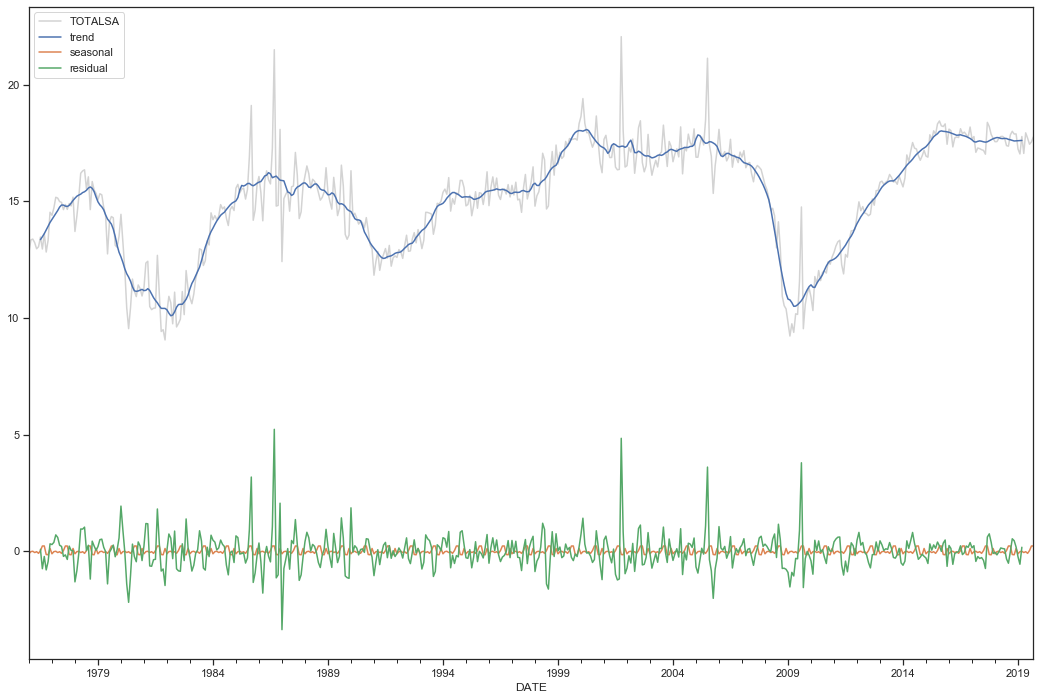

In [22]:
fig, ax = plt.subplots(figsize=(18,12))
vehicle_sales.plot(ax=ax, label="observed", c='lightgrey')

df_decomposed.plot(ax=ax, label="trend")
plt.legend(loc='upper left');

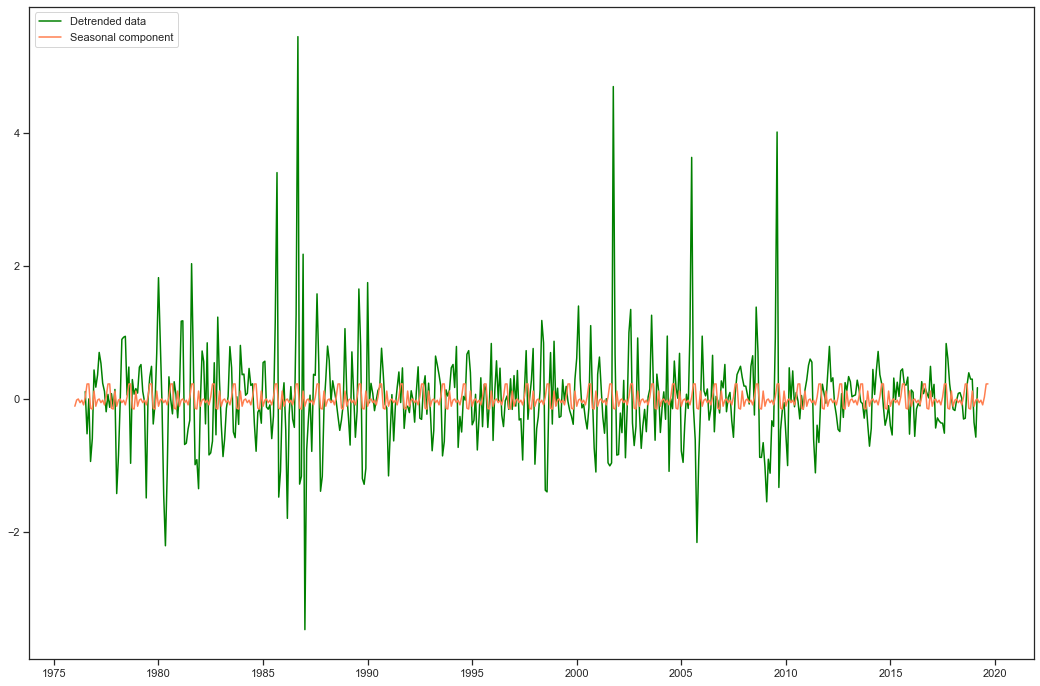

In [23]:
fig, ax = plt.subplots(figsize=(18,12))

ax.plot(vehicle_sales - trend, 
         color='Green', label='Detrended data')

ax.plot(seasonal, 
         color='Coral', label='Seasonal component')

plt.legend(loc='upper left');